# Exploratory Data Analysis of Haberman Dataset

In [13]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haberman=pd.read_csv("haberman.csv")

In [14]:
# how many data points and feature are there
print(haberman.shape)

(306, 4)


In [15]:
print(haberman.columns)# coloumn name in our dataset

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [16]:
haberman.head()


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Dataset observation :
  The first column is the age, second is the year in which it had been operated 
  third is the node which refers to the number of tumour found,fourth is the status after operation(here 1 refers to person       surived more than 5 years and 2 refers survived for less than 5 years

In [17]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [18]:
#This shows that 225 people had lived for more than 5 years and
#81 people survived for less than 5 years
# it is also an imabalnced dataset as there are more people who has survived for more than 5 years 


# 2-D Scatter Plot

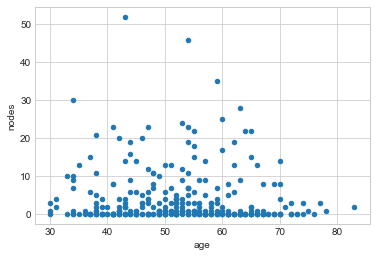

In [38]:
# now lets check with 2-d plot
haberman.plot(kind="scatter",x="age",y="nodes")
plt.show()

from above 2-d plot we can't figure out what is going on it seems that when we take age and nodes we find that most of people have zero nodes 

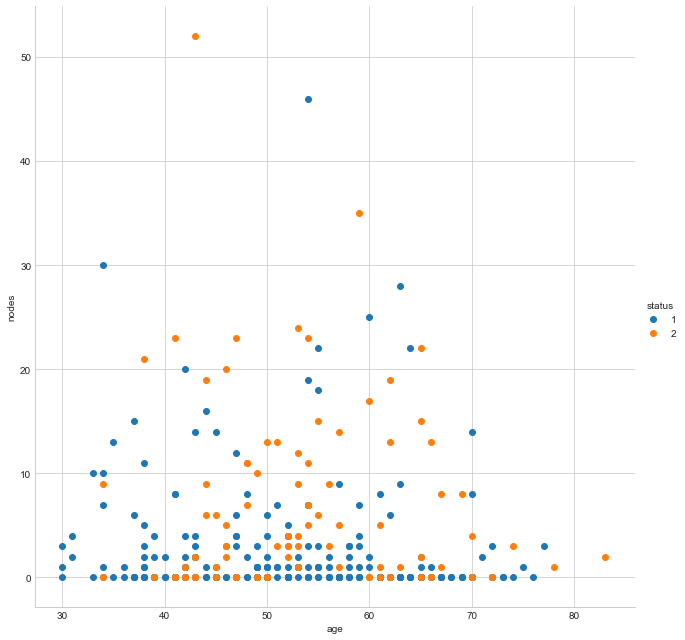

In [35]:
# 2-D Scatter plot with color-coding for each  type/class.
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="status",size=9).map(plt.scatter,"age","nodes")\
.add_legend()
plt.show()

By seeing color we can see that there are more blue points as compare to orange
it seems people survived for more than 5 years(1) after operation but still no descision can be taken as 2 differnt dataset are not fully
separted to give clear conclusion it should be always taken care that a line can distinguish between them

# pair plot


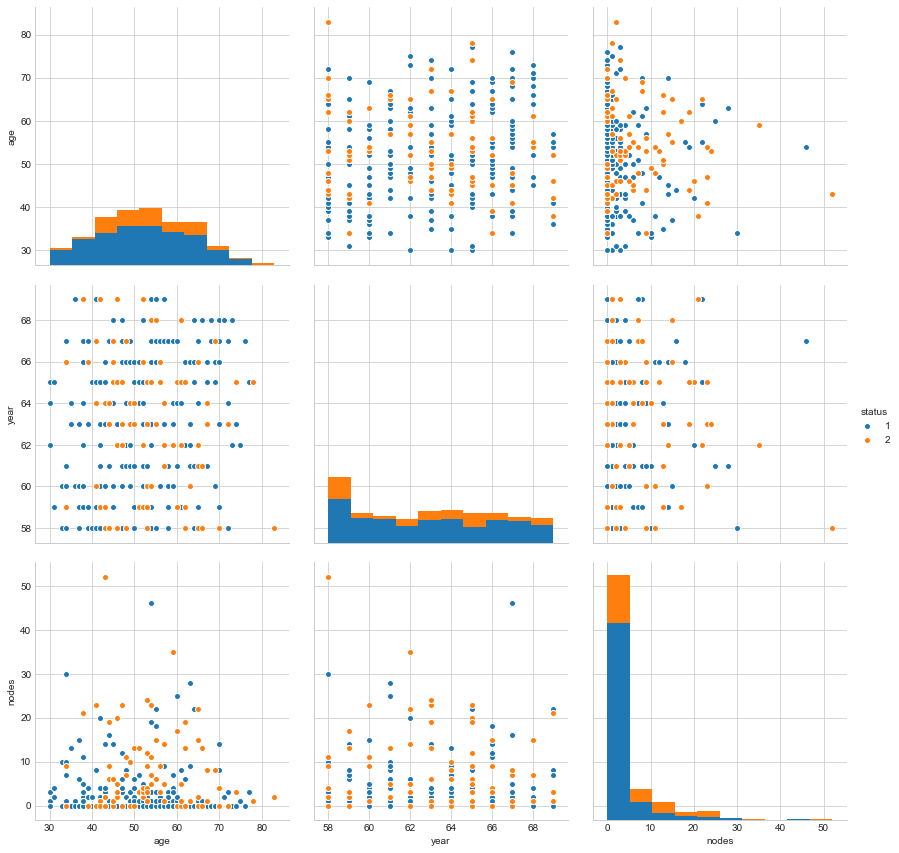

In [22]:
#number of combination feature 3c2
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="status",vars=["age","year","nodes"],size=4)
plt.show()

The diagonal element are PDFs for each feature

observation:
none of the pair plot make sense 

# histogram,pdf,cdf

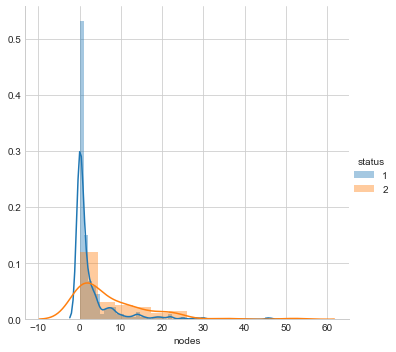

In [23]:
sns.FacetGrid(haberman,hue="status",size=5).map(sns.distplot,"nodes").add_legend()
plt.show()

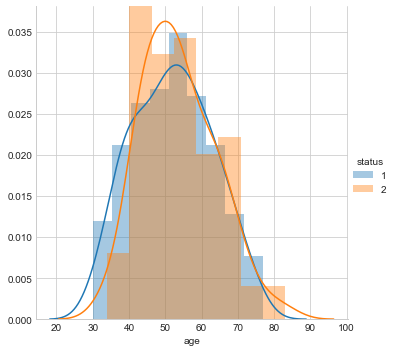

In [24]:
sns.FacetGrid(haberman,hue="status",size=5).map(sns.distplot,"age").add_legend()
plt.show()

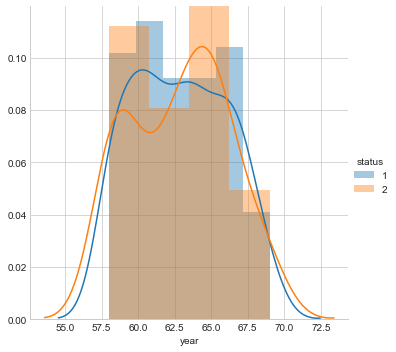

In [25]:
sns.FacetGrid(haberman,hue="status",size=5).map(sns.distplot,"year").add_legend()
plt.show()

observation:
1.Only the node give the clear picture as it shows the status of different patients who have zero nodes had survived

In [26]:
#cdf
# Dividing the datset in 2 label according to the status
#alive=1 and dead=2
#https://github.com/bethusaisampath/Haberman-Cancer-Survival-Dataset/blob/master/Haberman.ipynb
#the below code of cdf was  been taken from the github source mentioned above and then modified i am verymuch thankful to that person

In [27]:
alive=haberman.loc[haberman["status"]==1]
dead=haberman.loc[haberman["status"]==2]

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


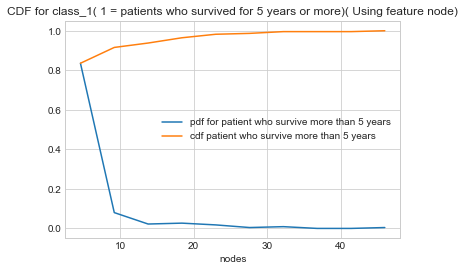

In [37]:
counts,bin_edges=np.histogram(alive["nodes"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(["pdf for patient who survive more than 5 years","cdf patient who survive more than 5 years"])
plt.xlabel("nodes")
plt.title("CDF for class_1( 1 = patients who survived for 5 years or more)( Using feature node)");
plt.show()

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


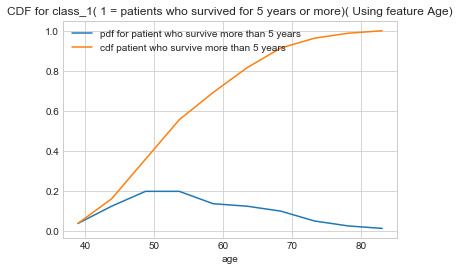

In [36]:
counts,bin_edges=np.histogram(dead["age"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(["pdf for patient who survive more than 5 years","cdf patient who survive more than 5 years"])
plt.title("CDF for class_1( 1 = patients who survived for 5 years or more)( Using feature Age)")
plt.xlabel("age")
plt.show()

In [33]:
# MEAN, Variance STD DEVIATION
print(np.mean(np.append(alive["nodes"],550)));

print(np.mean(alive["nodes"]))
print(np.mean(dead["nodes"]))

print("\nStd-dev:"); 
print(np.std(alive["nodes"]))
print(np.std(dead["nodes"]))

5.212389380530974
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


# Median, Percentile, Quantile, IQR, MAD

In [34]:
print("\nMedians:")
print(np.median(alive["nodes"]))

print(np.median(np.append(alive["nodes"],50)));
print(np.median(dead["nodes"]))

print("\nQuantiles:")
print(np.percentile(alive["nodes"],np.arange(0, 100, 25)))
print(np.percentile(dead["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(alive["nodes"],90))
print(np.percentile(dead["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(alive["nodes"]))
print(robust.mad(dead["nodes"]))


Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# BOX-Plot

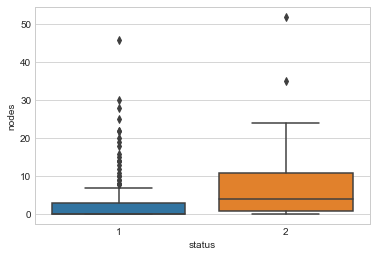

In [35]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

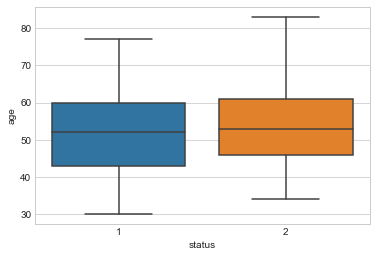

In [36]:
sns.boxplot(x="status",y='age', data=haberman)
plt.show()

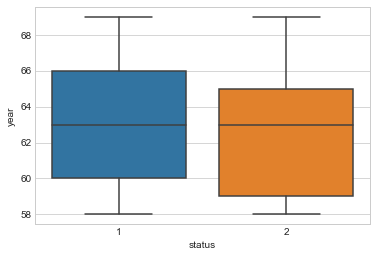

In [37]:
sns.boxplot(x='status',y='year', data=haberman)
plt.show()

# VIOLIN-plot

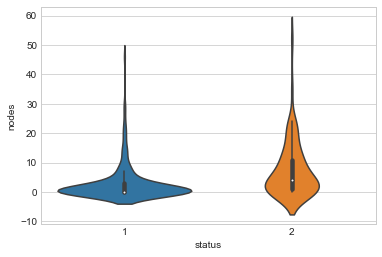

In [38]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

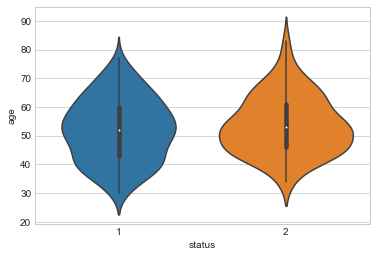

In [39]:
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.show()

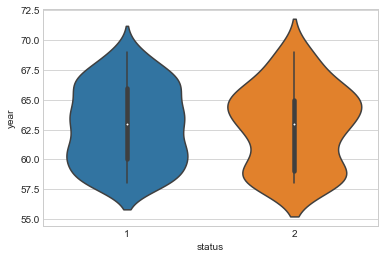

In [40]:
sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.show()

observation:
Number  of patients who died  between age of 46-62,year between 1959-65 and the patients who survived have age between 42-60, year between 1960-66.

# Contour-plot

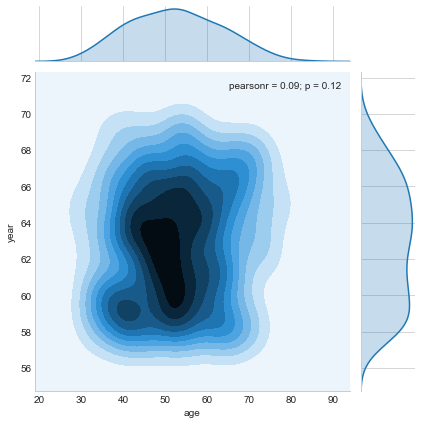

In [41]:
sns.jointplot(x="age", y="year", data=haberman, kind="kde"); plt.show()

observation:
more patient survived from 1959 t0 1965

# Conclusion

Dataset observation : The first column is the age, second is the year in which it had been operated third is the node which refers to the number of tumour found,fourth is the status after operation(here 1 refers to person surived more than 5 years and 2 refers survived for less than 5 years

2-d plot we can't figure out what is going on it seems that when we take age and nodes we find that most of people have zero nodes

By seeing color we can see that there are more blue points as compare to orange it seems people survived for more than 5 years(1) after operation but still no descision can be taken as 2 differnt dataset are not fully separted to give clear conclusion it should be always taken care that a line can distinguish between them

In pair plot none of the pair plot make sense

In PDF Only the node give the clear picture as it shows the status of different patients who have zero nodes had survived

In violin plot Number of patients who died between age of 46-62,year between 1959-65 and the patients who survived have age between 42-60, year between 1960-66.


In contour plot more patient survived from 1959 t0 1965


          